In [37]:
import pandas as pd
import numpy as np
import io
# import pandas_profiling

retail_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced_data_quality.csv')
# Kolom city
length_city = len(retail_raw['city'])
print('Length kolom city:', length_city)

# Tugas Praktek: Kolom product_id
length_product_id = len(retail_raw['product_id'])
print('Length kolom product_id:', length_product_id)

Length kolom city: 5000
Length kolom product_id: 5000


# Cleaning Data

In [38]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(retail_raw.isnull().any())

# Filling the missing value (imputasi)
print('\nFilling the missing value (imputasi):')
print(retail_raw['quantity'].fillna(retail_raw.quantity.mean()))

# Drop missing value
print('\nDrop missing value:')
print(retail_raw['quantity'].dropna())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool

Filling the missing value (imputasi):
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 5000, dtype: float64

Drop missing value:
0       10.0
1        2.0
2        8.0
3        4.0
4        2.0
        ... 
4995     2.0
4996     3.0
4997     4.0
4998     8.0
4999     1.0
Name: quantity, Length: 4986, dtype: float64


In [39]:
print(retail_raw['item_price'].fillna(retail_raw['item_price'].mean()))

0       7.400000e+05
1       6.040000e+05
2       1.045000e+06
3       2.050000e+05
4       9.337427e+05
            ...     
4995    4.500000e+05
4996    1.465000e+06
4997    7.470000e+05
4998    6.950000e+05
4999    1.045000e+06
Name: item_price, Length: 5000, dtype: float64


# Data Cleansing menggunakan quantile ingat : IQR (Interquartile range)


In [40]:
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 -Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal : ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 *  IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]

# print shape setelah dilakukan removing outliers
print('Shape akhir : ', retail_raw.shape)

Shape awal :  (5000, 9)
Shape akhir :  (4699, 9)


## Tugas Praktek

In [41]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1 - 1.5 * IQR)) | (retail_raw['quantity'] > (Q3 + 1.5 * IQR)))]


# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape awal:  (4699, 9)
Shape akhir:  (4621, 9)


Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya. Tentunya ada data yang duplikat dalam dataset yang dimiliki. Kondisi duplikasi harus diatasi dengan jalan mengeliminir baris yang mengalami duplikasi, sehingga proses ini dikenal dengan deduplikasi.

Untuk mencek duplikasi data:
nama_dataframe.duplicate(subset=None)


Syntax untuk membuang duplikasi:
nama_dataframe.drop_duplicate()


In [42]:
retail_raw.duplicated(subset=None)
retail_raw.drop_duplicates(inplace=True)

# CASE STUDY DATA PROFILLING

In [43]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

#inspeksi dataframe uncleaned_raw
print('Lima data teratas:') 
print(uncleaned_raw.head())

#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:') 
print(uncleaned_raw.isnull().any())

#Persentase missing value
length_qty = len(uncleaned_raw['Quantity'])
count_qty = uncleaned_raw['Quantity'].count()

#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty

#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty) 

#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100) 

#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())


Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  

Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool
Persentase missing value kolom Quantity: 4.0%


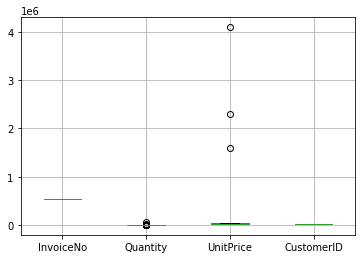

In [44]:
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

## Melakukan removing ouliers dan remove duplicates pada studi case

In [45]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()

0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
